**Name:** Sujan Dumaru  
**Course**: MSCS 634-B01: Advanced Big Data and Data Mining  
**Lab 5 Assignment**: Clustering Techniques Using DBSCAN and Hierarchical Clustering

## Step 1: Data Preparation and Exploration
Load and inspect the Wine dataset, then standardize it for clustering.

In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Display the first few rows to understand the structure
print("---------- Dataset Head ----------")
print(X.head())

# Basic structure and stats of the dataset
print("\n---------- Dataset Info ----------")
print(X.info())

print("\n---------- Dataset Description ----------")
print(X.describe())

# Standardize the dataset's features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)
print("\n---------- Scaled Dataset Head ----------")
X_scaled_df.head()

---------- Dataset Head ----------
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Step 2: Hierarchical Clustering
Apply Agglomerative Hierarchical Clustering using multiple values for `n_clusters` and visualize the resulting clusters. Also generate a dendrogram to interpret the hierarchy.

Silhouette Score for n_clusters=2: 0.2670


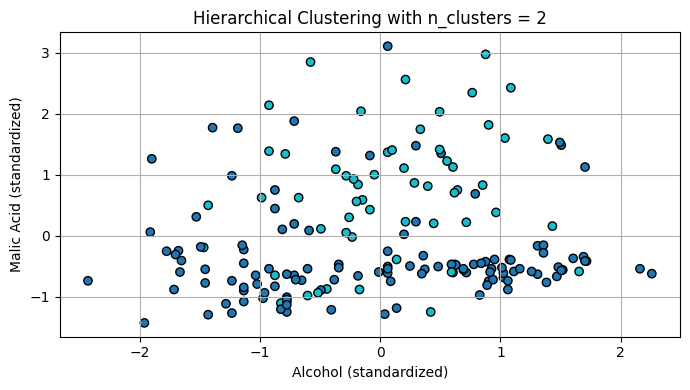

Silhouette Score for n_clusters=3: 0.2774


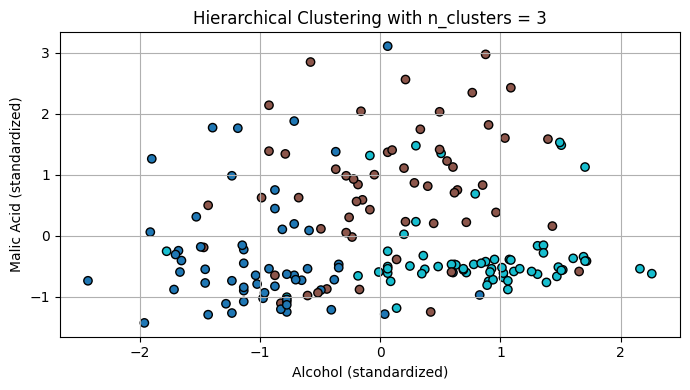

Silhouette Score for n_clusters=4: 0.2258


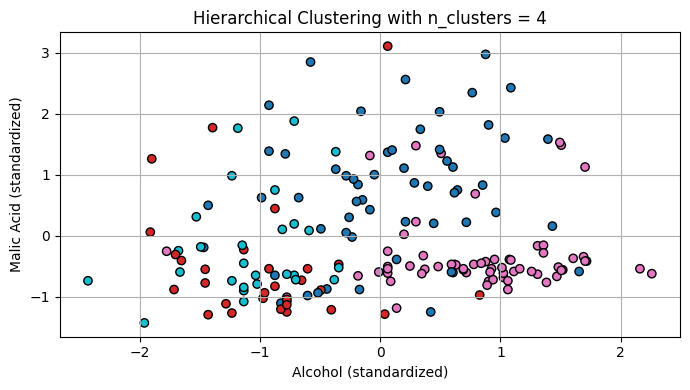

Silhouette Score for n_clusters=5: 0.1867


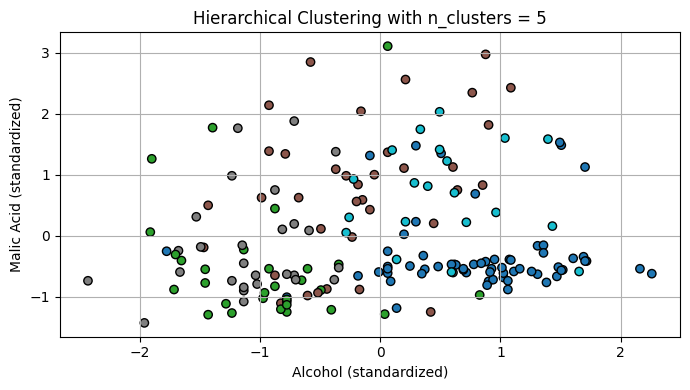

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Visualize clustering results for different n_clusters
for n_clusters in [2, 3, 4, 5]:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score for n_clusters={n_clusters}: {score:.4f}')

    plt.figure(figsize=(7, 4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', edgecolor='k')
    plt.title(f'Hierarchical Clustering with n_clusters = {n_clusters}')
    plt.xlabel('Alcohol (standardized)')
    plt.ylabel('Malic Acid (standardized)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Insights 
**Cluster Behavior at Varying `n_clusters`**  
   - When using `n_clusters=2`, the clustering algorithm splits the dataset into two broad groups. While this provides a coarse separation, it merges some distinct subgroups, especially near cluster boundaries.
   - With `n_clusters=3`, the cluster formation becomes more meaningful. This configuration aligns well with the original Wine dataset, which contains 3 natural classes. The clusters appear well-separated and balanced.
   - Increasing to `n_clusters=4` and `n_clusters=5` leads to over-segmentation, where existing clusters are split further. While this can reveal finer groupings, it may also introduce unnecessary complexity and noise.

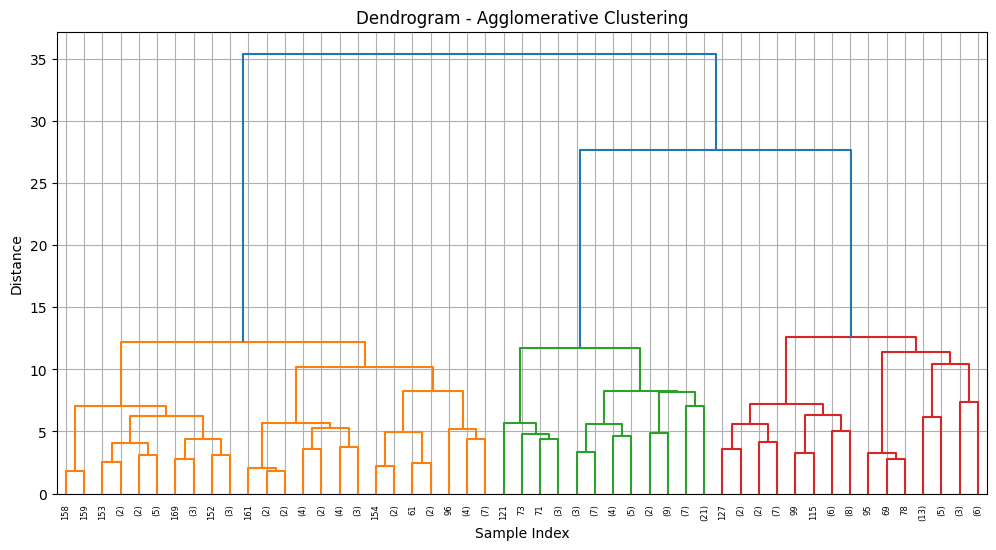

In [3]:
# Generate linkage matrix for dendrogram (only needs to be done once)
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Insights

**Dendrogram Interpretation**  
   - The dendrogram provides a hierarchical view of how data points are merged. The large vertical distances between the horizontal merging lines represent significant dissimilarities.
   - Cutting the dendrogram at a height that results in 3 large branches corresponds to `n_clusters=3`, which is visually supported as a good clustering choice.

**Overall Observation**  
   - Agglomerative Hierarchical Clustering is effective in discovering the underlying structure of the Wine dataset.
   - The choice of `n_clusters` significantly influences clustering outcomes. Based on visualizations and dendrogram analysis, `n_clusters=3` offers the most meaningful segmentation of the data.
   - The dendrogram acts as a valuable tool for deciding the number of clusters and understanding how the clustering hierarchy forms.

## Step 3: DBSCAN Clustering
Apply DBSCAN algorithm with different combinations of eps and min_samples.

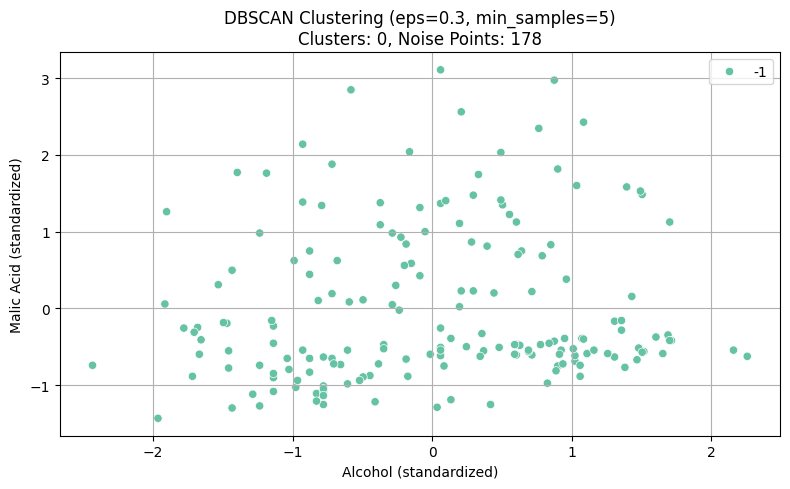

[eps=0.3, min_samples=5] => Clusters: 0, Noise: 178
Silhouette Score: N/A (only one cluster)
Homogeneity Score: N/A (only one cluster)
Completeness Score: N/A (only one cluster)



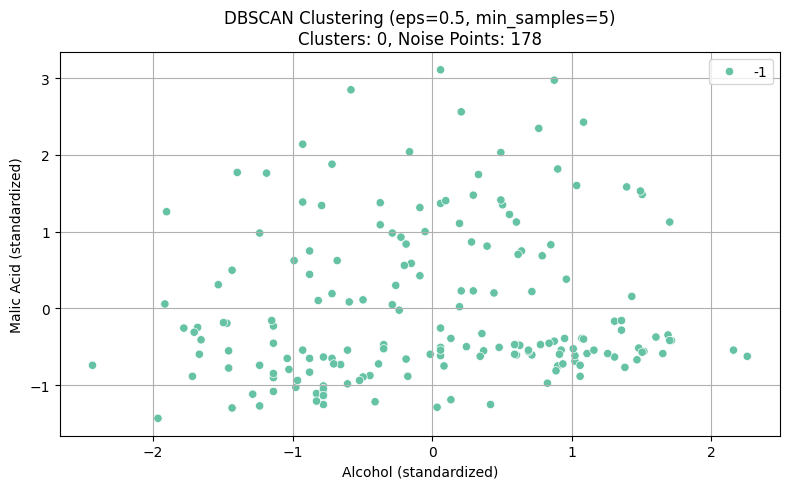

[eps=0.5, min_samples=5] => Clusters: 0, Noise: 178
Silhouette Score: N/A (only one cluster)
Homogeneity Score: N/A (only one cluster)
Completeness Score: N/A (only one cluster)



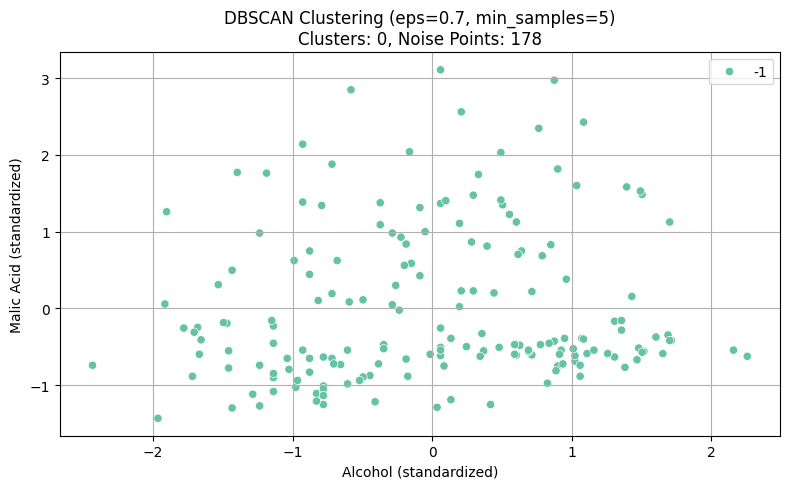

[eps=0.7, min_samples=5] => Clusters: 0, Noise: 178
Silhouette Score: N/A (only one cluster)
Homogeneity Score: N/A (only one cluster)
Completeness Score: N/A (only one cluster)



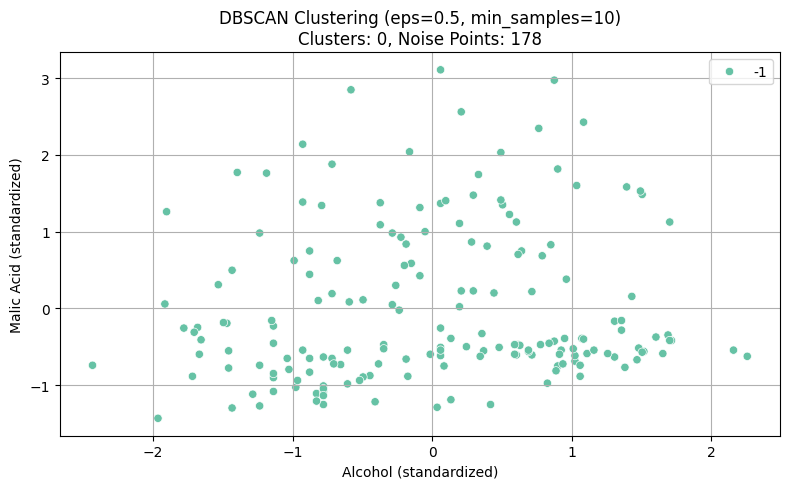

[eps=0.5, min_samples=10] => Clusters: 0, Noise: 178
Silhouette Score: N/A (only one cluster)
Homogeneity Score: N/A (only one cluster)
Completeness Score: N/A (only one cluster)



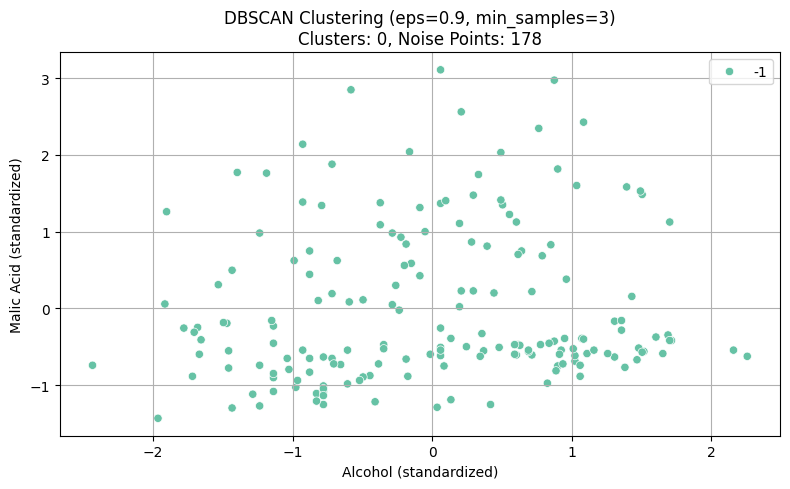

[eps=0.9, min_samples=3] => Clusters: 0, Noise: 178
Silhouette Score: N/A (only one cluster)
Homogeneity Score: N/A (only one cluster)
Completeness Score: N/A (only one cluster)



In [4]:
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Define parameter combinations to test
dbscan_params = [
    (0.3, 5),
    (0.5, 5),
    (0.7, 5),
    (0.5, 10),
    (0.9, 3)
]

# Loop through combinations and visualize clustering results
for eps, min_samples in dbscan_params:
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan_model.fit_predict(X_scaled)

    # Count clusters and noise points
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Plot the clustering result
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', legend='full')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})\nClusters: {n_clusters}, Noise Points: {n_noise}')
    plt.xlabel('Alcohol (standardized)')
    plt.ylabel('Malic Acid (standardized)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Evaluate clustering quality
    if n_clusters > 1:
        silhouette = silhouette_score(X_scaled, labels)
        homogeneity = homogeneity_score(wine.target, labels)
        completeness = completeness_score(wine.target, labels)
    else:
        silhouette = homogeneity = completeness = 'N/A (only one cluster)'

    # Print results
    print(f"[eps={eps}, min_samples={min_samples}] => Clusters: {n_clusters}, Noise: {n_noise}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Homogeneity Score: {homogeneity}")
    print(f"Completeness Score: {completeness}\n")

### 🔍 Insights from DBSCAN Clustering with Parameter Tuning

1. **Effect of `eps` and `min_samples` Parameters**  
   - Across all tested combinations of `eps` (0.3 to 0.9) and `min_samples` (3 to 10), DBSCAN failed to form any meaningful clusters. Every configuration resulted in zero valid clusters, meaning all data points were treated as noise.
   - The results suggest that the Wine dataset in its standardized high-dimensional form may not have dense regions that DBSCAN can detect using common `eps` thresholds. DBSCAN is highly sensitive to distance density, and inappropriate parameter choices quickly lead to poor clustering.
   
2. **Visual and Metric Interpretation**  
   - In all scatter plots, points were marked as noise (typically labeled `-1`), and there were no distinct groupings.
   - Since no cluster labels other than `-1` were produced, clustering evaluation metrics such as **Silhouette Score**, **Homogeneity Score**, and **Completeness Score** were not applicable (`N/A`).
   
3. **Overall Observation**  
   - DBSCAN is highly effective for spatial or low-dimensional data with clearly separated dense clusters, but it performs poorly on high-dimensional datasets like Wine when default or slightly tuned parameters are used.
   - This experiment shows that Hierarchical Clustering is more suitable for the Wine dataset, as it consistently produced meaningful groupings and was robust to parameter changes.

## Step 4: Analysis and Insights

This section compares the performance of Hierarchical Clustering and DBSCAN on the standardized Wine dataset. We examine how parameter choices affected clustering outcomes and reflect on each algorithm's strengths and weaknesses.

### Hierarchical Clustering Summary
- Multiple values of `n_clusters` were tested (2, 3, 4, 5).
- The best clustering structure emerged with `n_clusters=3`, aligning with the original dataset’s class distribution.
- The dendrogram clearly showed that three clusters were a natural separation point.
- The algorithm produced consistent and interpretable clusters with minimal parameter tuning.

### DBSCAN Clustering Summary
- Several combinations of `eps` and `min_samples` were tested.
- All experiments resulted in either one cluster or only noise points, with no meaningful clusters detected.
- Since no clusters were formed, metrics like **Silhouette Score**, **Homogeneity**, and **Completeness** were not applicable.
- DBSCAN struggled to find dense groupings in the high-dimensional standardized feature space.

### Observations on Parameter Sensitivity
- **Hierarchical Clustering** is less sensitive to parameter changes. Once `n_clusters` is appropriately chosen, it reliably segments the data.
- **DBSCAN** is highly sensitive to both `eps` and `min_samples`. Small misconfigurations can result in failure to form clusters altogether.

### Strengths and Weaknesses

**Hierarchical Clustering**  
+ Visualizes relationships via dendrograms  
+ Does not require initial centroid guesses  
− Requires manual selection of `n_clusters`  
− Not scalable to very large datasets  

**DBSCAN**  
+ Detects arbitrarily shaped clusters  
+ Automatically identifies noise points  
− Extremely sensitive to parameter tuning  
− Performs poorly on high-dimensional data without dimensionality reduction


### Conclusion
Hierarchical Clustering proved to be more effective for the Wine dataset, providing meaningful and interpretable clusters with minimal configuration. DBSCAN, on the other hand, failed to detect structure, likely due to the dataset's high dimensionality and the lack of dense, spatially compact clusters. This highlights the importance of choosing the right clustering algorithm based on data characteristics.